<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
# --- 2. Identify and manage missing values in critical columns ---
print("\n### Managing Missing Values in Critical Columns ###")

# Identify columns with missing values
missing_values_count = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing values in critical columns before management:")
print(missing_values_count)
print("-" * 30)

# Strategy:
# - Drop rows where 'JobSat' is missing, as this is a key target variable and imputation might introduce bias.
# - Impute 'Employment' and 'RemoteWork' with the most frequent value, as these are descriptive features and losing rows is undesirable.

# --- Drop rows with missing 'JobSat' ---
print("\nDropping rows with missing 'JobSat' values...")
df_cleaned = df.dropna(subset=['JobSat'])
print(f"Original shape: {df.shape}, New shape: {df_cleaned.shape}")

# --- Impute missing values in 'Employment' and 'RemoteWork' ---
print("\nImputing missing values in 'Employment' and 'RemoteWork' with the mode (most frequent value)...")

# Get the mode for each column from the cleaned DataFrame
employment_mode = df_cleaned['Employment'].mode()[0]
remotework_mode = df_cleaned['RemoteWork'].mode()[0]

print(f"Most frequent value for 'Employment': '{employment_mode}'")
print(f"Most frequent value for 'RemoteWork': '{remotework_mode}'")

# Fill the missing values
df_cleaned['Employment'].fillna(employment_mode, inplace=True)
df_cleaned['RemoteWork'].fillna(remotework_mode, inplace=True)

print("\nMissing values in critical columns after management:")
print(df_cleaned[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())
print("-" * 50)



### Managing Missing Values in Critical Columns ###

Missing values in critical columns before management:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
------------------------------

Dropping rows with missing 'JobSat' values...
Original shape: (65437, 114), New shape: (29126, 114)

Imputing missing values in 'Employment' and 'RemoteWork' with the mode (most frequent value)...
Most frequent value for 'Employment': 'Employed, full-time'
Most frequent value for 'RemoteWork': 'Hybrid (some remote, some in-person)'

Missing values in critical columns after management:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64
--------------------------------------------------


/tmp/ipykernel_300/2423691501.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Employment'].fillna(employment_mode, inplace=True)
/tmp/ipykernel_300/2423691501.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Employment'].fillna(employment_mode, inplace=True)
/tmp/ipykernel_300/2423691501.py:32: FutureWarning: A

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [11]:
import numpy as np
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 176.6 MB/s eta 0:00:00


In [12]:
## Write your code here
df = pd.read_csv(data_url)

print("Original DataFrame:")
print(df)
print("-" * 50)

# --- 2. Identify and manage missing values in critical columns ---
print("\n### Managing Missing Values in Critical Columns ###")

# Identify columns with missing values
missing_values_count = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing values in critical columns before management:")
print(missing_values_count)
print("-" * 30)

# Strategy:
# - Drop rows where 'JobSat' is missing, as this is a key target variable and imputation might introduce bias.
# - Impute 'Employment' and 'RemoteWork' with the most frequent value, as these are descriptive features and losing rows is undesirable.

# --- Drop rows with missing 'JobSat' ---
print("\nDropping rows with missing 'JobSat' values...")
df_cleaned = df.dropna(subset=['JobSat'])
print(f"Original shape: {df.shape}, New shape: {df_cleaned.shape}")

# --- Impute missing values in 'Employment' and 'RemoteWork' ---
print("\nImputing missing values in 'Employment' and 'RemoteWork' with the mode (most frequent value)...")

# Get the mode for each column from the cleaned DataFrame
employment_mode = df_cleaned['Employment'].mode()[0]
remotework_mode = df_cleaned['RemoteWork'].mode()[0]

print(f"Most frequent value for 'Employment': '{employment_mode}'")
print(f"Most frequent value for 'RemoteWork': '{remotework_mode}'")

# Fill the missing values
df_cleaned['Employment'].fillna(employment_mode, inplace=True)
df_cleaned['RemoteWork'].fillna(remotework_mode, inplace=True)

print("\nMissing values in critical columns after management:")
print(df_cleaned[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())
print("-" * 50)

# Display the final cleaned DataFrame head
print("\nCleaned DataFrame head:")
print(df_cleaned.head())
print("-" * 50)

# --- The rest of your existing data cleaning and transformation code would follow here, using df_cleaned ---

# --- Log-transform the ConvertedCompYearly column to reduce skewness ---
print("\n### Applying Log Transformation and Min-Max Scaling to ConvertedCompYearly on Cleaned Data ###")

# It's important to re-impute the numerical column on the cleaned DataFrame
mean_comp_cleaned = df_cleaned['ConvertedCompYearly'].mean()
df_cleaned['ConvertedCompYearly_Imputed'] = df_cleaned['ConvertedCompYearly'].fillna(mean_comp_cleaned)

# Apply Log Transformation
df_cleaned['ConvertedCompYearly_LogTransformed'] = np.log(df_cleaned['ConvertedCompYearly_Imputed'] + 1)
print("\nCleaned DataFrame with Log Transformed 'ConvertedCompYearly' column:")
print(df_cleaned[['ConvertedCompYearly', 'ConvertedCompYearly_LogTransformed']].head())

# Apply Min-Max Scaling to the log-transformed data
scaler = MinMaxScaler()
df_cleaned['ConvertedCompYearly_Normalized_Log_MinMax'] = scaler.fit_transform(df_cleaned[['ConvertedCompYearly_LogTransformed']])
print("\nCleaned DataFrame with Normalized 'ConvertedCompYearly' column:")
print(df_cleaned[['ConvertedCompYearly', 'ConvertedCompYearly_Normalized_Log_MinMax']].head())
print("-" * 50)


# --- Create a new column 'ExperienceLevel' based on 'YearsCodePro' ---
print("\n### Creating 'ExperienceLevel' from 'YearsCodePro' ###")

# Impute missing 'YearsCodePro' values with the median before creating ranges
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')
df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median(), inplace=True)

bins = [0, 5, 10, 20, np.inf]
labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']
df_cleaned['ExperienceRange'] = pd.cut(df_cleaned['YearsCodePro'], bins=bins, labels=labels, right=False)

print("\nCleaned DataFrame showing the new 'ExperienceLevel' column:")
print(df_cleaned[['YearsCodePro', 'ExperienceLevel']].head())
print("-" * 50)


# --- Standardize entries in 'Country' and 'EdLevel' ---
print("\n### Standardizing 'Country' and 'EdLevel' Columns ###")
df_cleaned['Country_Cleaned'] = df_cleaned['Country'].str.lower().str.strip()
country_standardization_map = {
    'usa': 'United States', 'uk': 'United Kingdom', 'canada': 'Canada',
    'france': 'France', 'germany': 'Germany', 'united kingdom': 'United Kingdom',
    'unknown': np.nan
}
df_cleaned['Country_Standardized'] = df_cleaned['Country_Cleaned'].map(country_standardization_map)
df_cleaned['Country_Standardized'].fillna(df_cleaned['Country_Cleaned'], inplace=True)

df_cleaned['EdLevel_Cleaned'] = df_cleaned['EdLevel'].str.lower().str.strip()
edlevel_standardization_map = {
    'bachelors': 'Bachelor\'s Degree', 'masters': 'Master\'s Degree', 'phd': 'PhD',
    'high school': 'High School', 'less than a bachelors': 'Less than a Bachelor\'s Degree'
}
df_cleaned['EdLevel_Standardized'] = df_cleaned['EdLevel_Cleaned'].map(edlevel_standardization_map)
df_cleaned['EdLevel_Standardized'].fillna(df_cleaned['EdLevel_Cleaned'], inplace=True)

print("\nStandardized 'Country' and 'EdLevel' columns:")
print(df_cleaned[['Country_Standardized', 'EdLevel_Standardized']].head())
print("-" * 50)

# --- Analysis of Job Satisfaction by Years of Professional Coding Experience ---
print("\n### Analysis: Job Satisfaction vs. Professional Coding Experience ###")

# Map categorical 'JobSat' to a numerical scale for analysis
satisfaction_mapping = {
    'Dissatisfied': 1,
    'Satisfied': 2,
    'Very satisfied': 3
}
df_cleaned['JobSat_Numerical'] = df_cleaned['JobSat'].map(satisfaction_mapping)

# Impute missing 'YearsCodePro' values with the median before creating ranges
df_cleaned['YearsCodePro_Imputed'] = df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median())

# Create experience ranges for 'YearsCodePro'
bins_years = [0, 5, 10, 20, np.inf]
labels_years = ['0-5 years', '5-10 years', '10-20 years', '20+ years']
df_cleaned['ExperienceRange'] = pd.cut(df_cleaned['YearsCodePro_Imputed'], bins=bins_years, labels=labels_years, right=False)

# Calculate the median job satisfaction score for each experience range
median_satisfaction = df_cleaned.groupby('ExperienceRange')['JobSat_Numerical'].median()

print("\nMedian Job Satisfaction Score by Experience Range:")
print(median_satisfaction)

# Visualize the relationship with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='viridis')
plt.title('Median Job Satisfaction by Professional Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.show()

print("-" * 50)

Original DataFrame:
       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time 

/tmp/ipykernel_300/3100669704.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Employment'].fillna(employment_mode, inplace=True)
/tmp/ipykernel_300/3100669704.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Employment'].fillna(employment_mode, inplace=True)
/tmp/ipykernel_300/3100669704.py:38: FutureWarning: A

    ResponseId                                         MainBranch  \
10          11  I used to be a developer by profession, but no...   
12          13                     I am a developer by profession   
15          16                     I am a developer by profession   
18          19                     I am a developer by profession   
20          21  I am not primarily a developer, but I write co...   

                Age           Employment  \
10  35-44 years old  Employed, full-time   
12  35-44 years old  Employed, full-time   
15  45-54 years old  Employed, full-time   
18  25-34 years old  Employed, full-time   
20  25-34 years old  Employed, full-time   

                              RemoteWork   Check  \
10                                Remote  Apples   
12  Hybrid (some remote, some in-person)  Apples   
15  Hybrid (some remote, some in-person)  Apples   
18  Hybrid (some remote, some in-person)  Apples   
20  Hybrid (some remote, some in-person)  Apples   

       

KeyError: "['ExperienceLevel'] not in index"

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.



### Analysis: Job Satisfaction vs. Professional Coding Experience ###

Median Job Satisfaction Score by Experience Range:
ExperienceRange
0-5 years     NaN
5-10 years    NaN
10-20 years   NaN
20+ years     NaN
Name: JobSat_Numerical, dtype: float64


/tmp/ipykernel_300/491505072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['JobSat_Numerical'] = df_cleaned['JobSat'].map(satisfaction_mapping)
/tmp/ipykernel_300/491505072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearsCodePro_Imputed'] = df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median())
/tmp/ipykernel_300/491505072.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

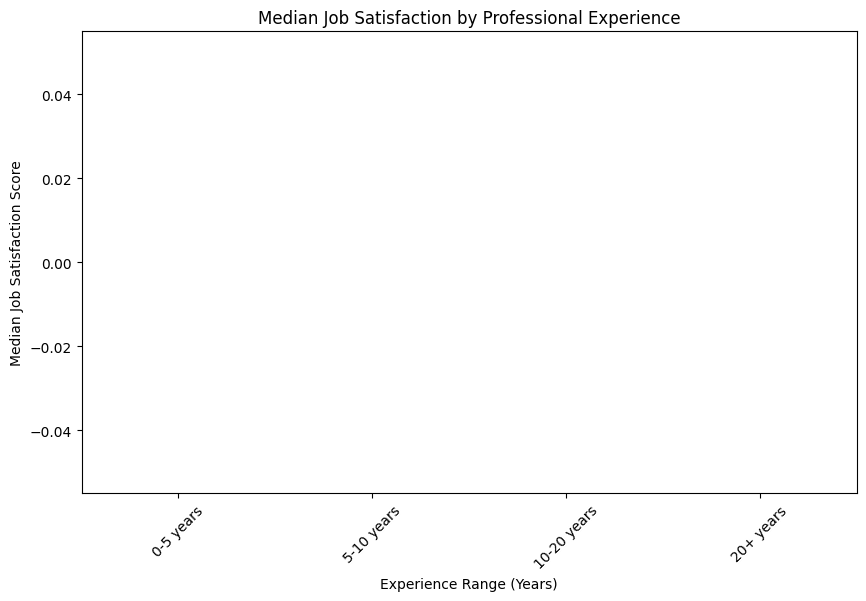

--------------------------------------------------

### Distribution of Job Satisfaction (JobSat) ###


/tmp/ipykernel_300/491505072.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='JobSat', order=df_cleaned['JobSat'].value_counts().index, palette='pastel')


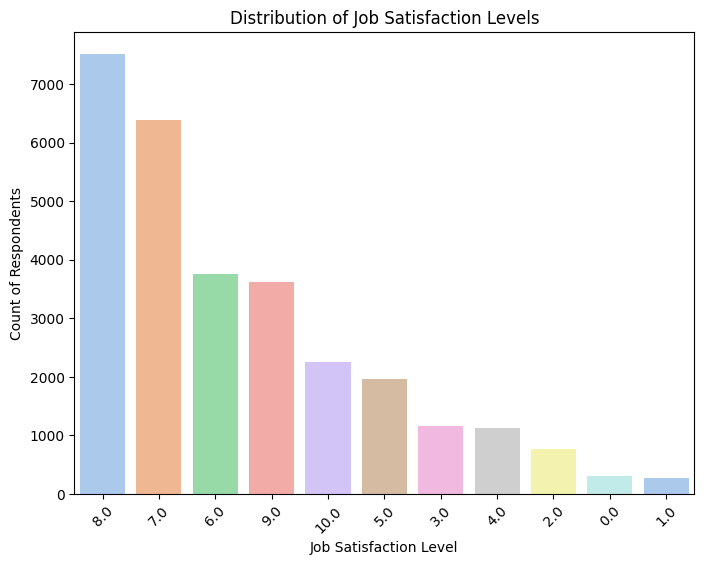

--------------------------------------------------


In [15]:
## Write your code here
# --- Analysis of Job Satisfaction by Years of Professional Coding Experience ---
print("\n### Analysis: Job Satisfaction vs. Professional Coding Experience ###")

# Map categorical 'JobSat' to a numerical scale for analysis
satisfaction_mapping = {
    'Dissatisfied': 1,
    'Satisfied': 2,
    'Very satisfied': 3
}
df_cleaned['JobSat_Numerical'] = df_cleaned['JobSat'].map(satisfaction_mapping)

# Impute missing 'YearsCodePro' values with the median before creating ranges
df_cleaned['YearsCodePro_Imputed'] = df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median())

# Create experience ranges for 'YearsCodePro'
bins_years = [0, 5, 10, 20, np.inf]
labels_years = ['0-5 years', '5-10 years', '10-20 years', '20+ years']
df_cleaned['ExperienceRange'] = pd.cut(df_cleaned['YearsCodePro_Imputed'], bins=bins_years, labels=labels_years, right=False)

# Calculate the median job satisfaction score for each experience range
median_satisfaction = df_cleaned.groupby('ExperienceRange')['JobSat_Numerical'].median()

print("\nMedian Job Satisfaction Score by Experience Range:")
print(median_satisfaction)

# Visualize the relationship with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='viridis')
plt.title('Median Job Satisfaction by Professional Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.show()

print("-" * 50)

# --- Visualization of JobSat Distribution ---
print("\n### Distribution of Job Satisfaction (JobSat) ###")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='JobSat', order=df_cleaned['JobSat'].value_counts().index, palette='pastel')
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.show()
print("-" * 50)


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.



### Analysis: Remote Work Trends by Employment Type ###

Distribution of Remote Work Preferences:
RemoteWork
Hybrid (some remote, some in-person)    12631
Remote                                  11103
In-person                                5392
Name: count, dtype: int64

Cross-tabulation of Remote Work by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                10009   
Employed, full-time;Employed, part-time                                               49   
Employed, full-time;Independent contractor, fre...                                   829   
Employed, full-time;Independent contractor, fre...                                    53   
Employed, full-time;Independent contractor, fre...                                     0   
...                          

/tmp/ipykernel_300/3075673792.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


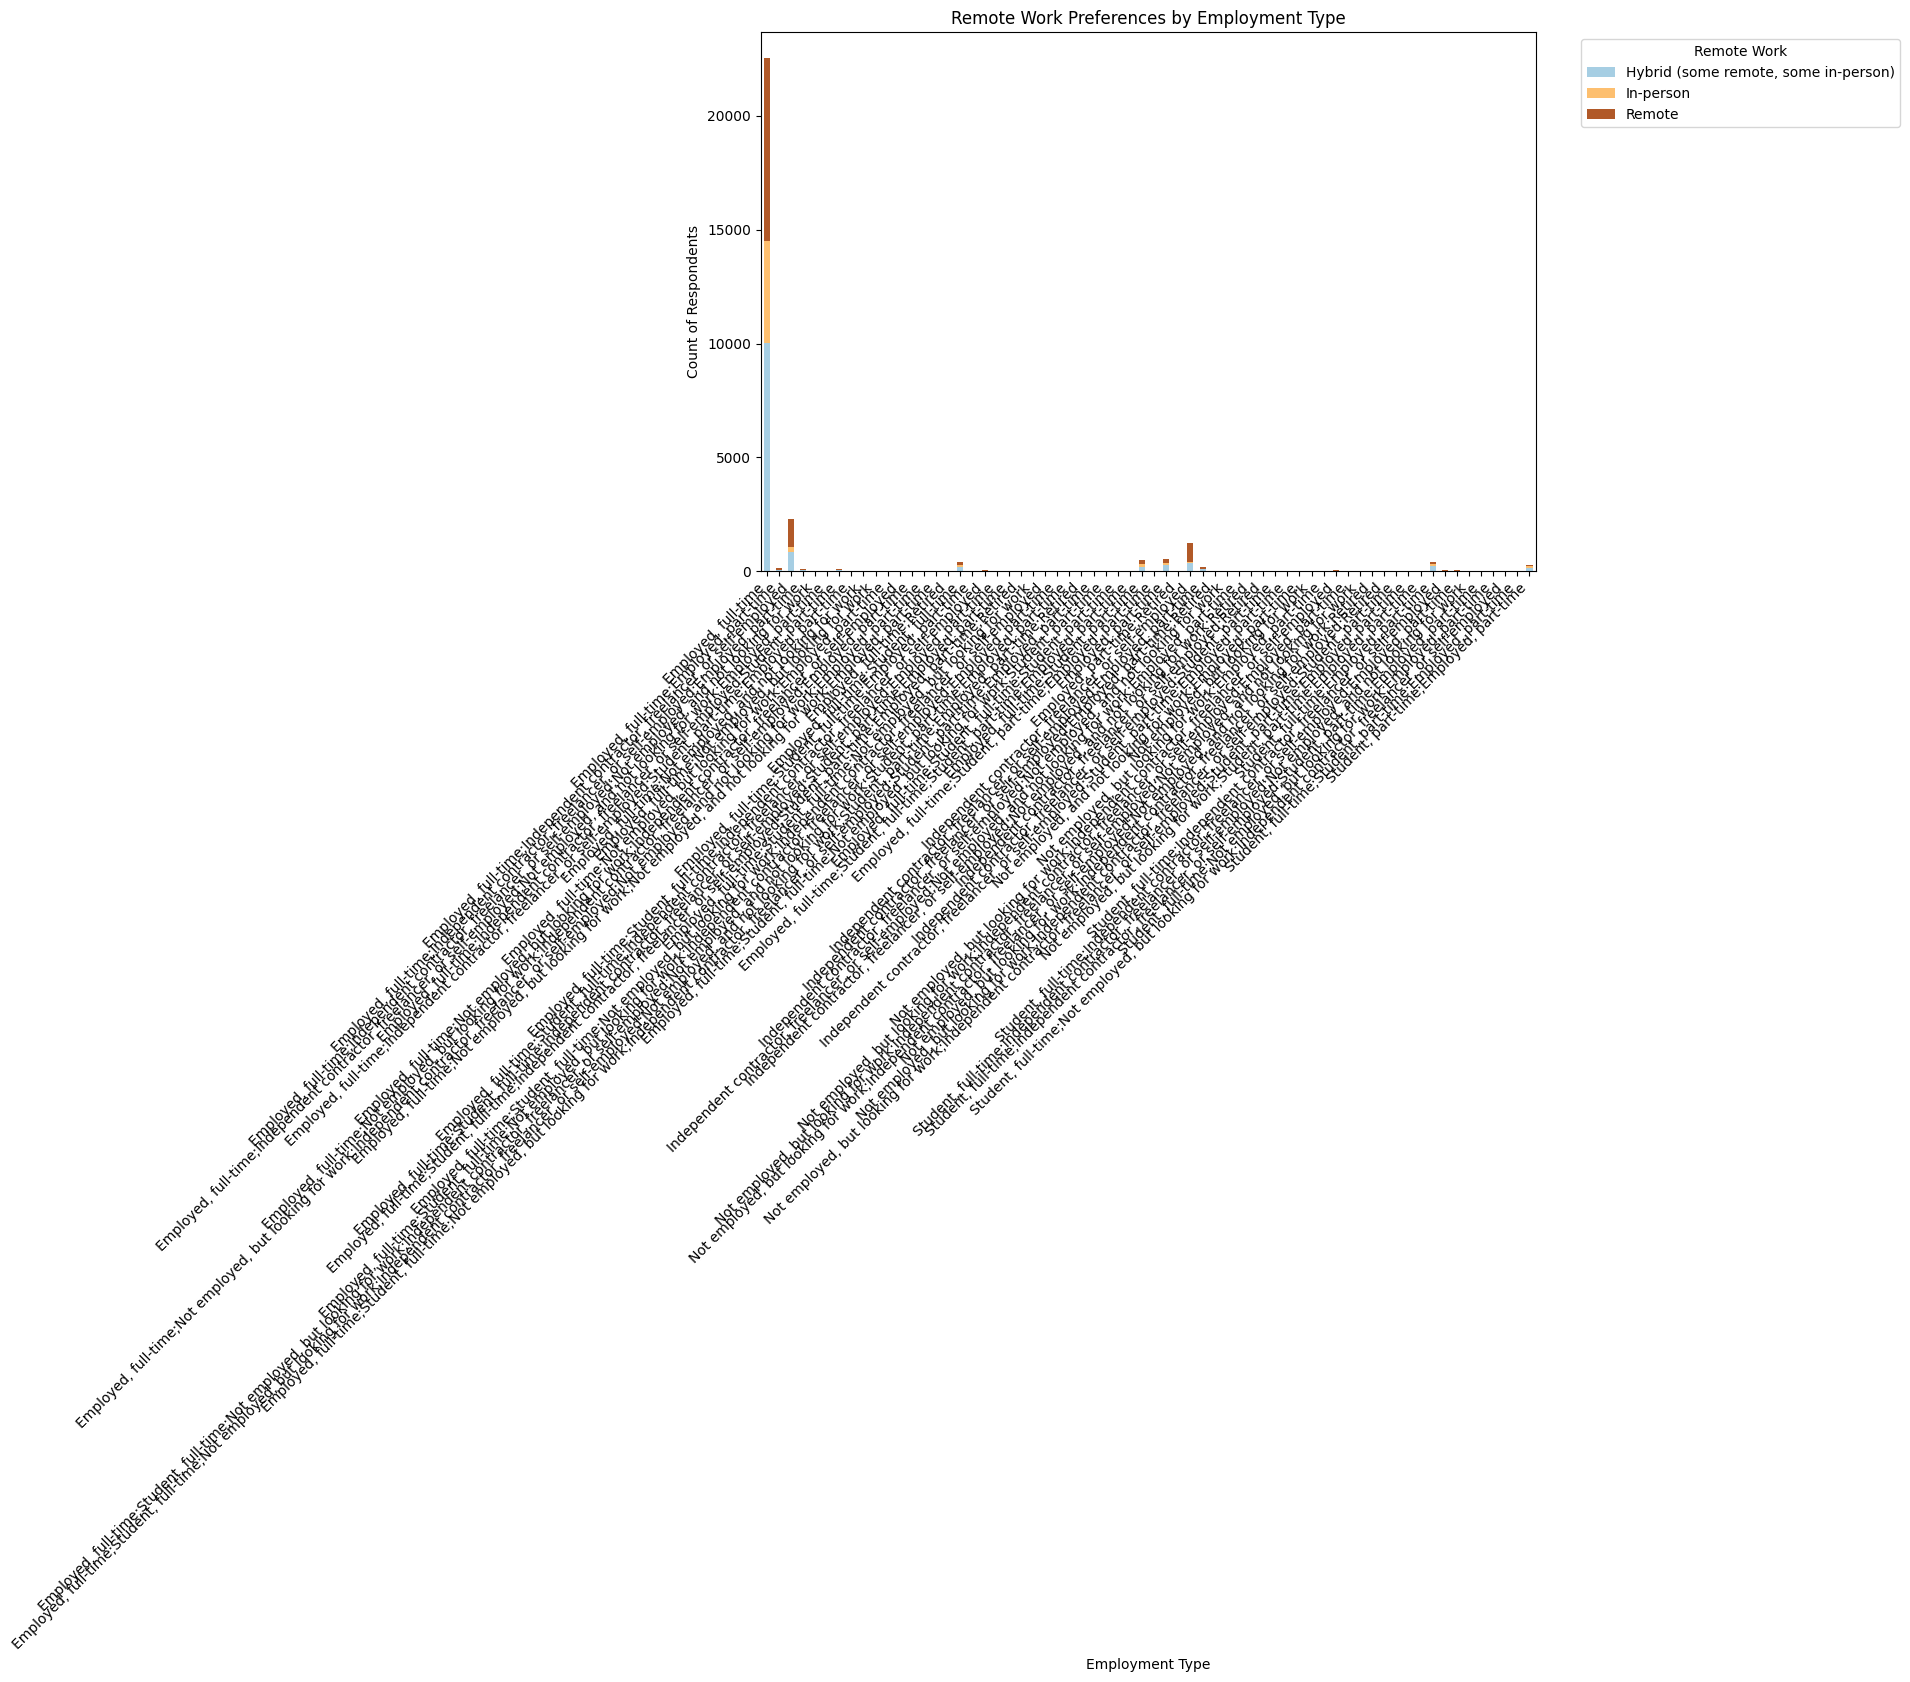

--------------------------------------------------


In [16]:
## Write your code here
# --- Analysis of Remote Work by Employment Type ---
print("\n### Analysis: Remote Work Trends by Employment Type ###")

# Check the distribution of RemoteWork preferences
print("\nDistribution of Remote Work Preferences:")
print(df_cleaned['RemoteWork'].value_counts())

# Cross-tabulate RemoteWork preferences by Employment type
cross_tab = pd.crosstab(df_cleaned['Employment'], df_cleaned['RemoteWork'])
print("\nCross-tabulation of Remote Work by Employment Type:")
print(cross_tab)

# Visualize the cross-tabulation as a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Paired')
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("-" * 50)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.



### Analysis: Programming Language Popularity by Region ###

--- Top Languages in united states of america ---
JavaScript                 3533
SQL                        3222
Python                     3098
HTML/CSS                   2936
Bash/Shell (all shells)    2554
Name: count, dtype: int64


/tmp/ipykernel_300/3707009262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country_Cleaned'] = df_cleaned['Country'].str.lower().str.strip()
/tmp/ipykernel_300/3707009262.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country_Standardized'] = df_cleaned['Country_Cleaned'].map(country_standardization_map)
/tmp/ipykernel_300/3707009262.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Th

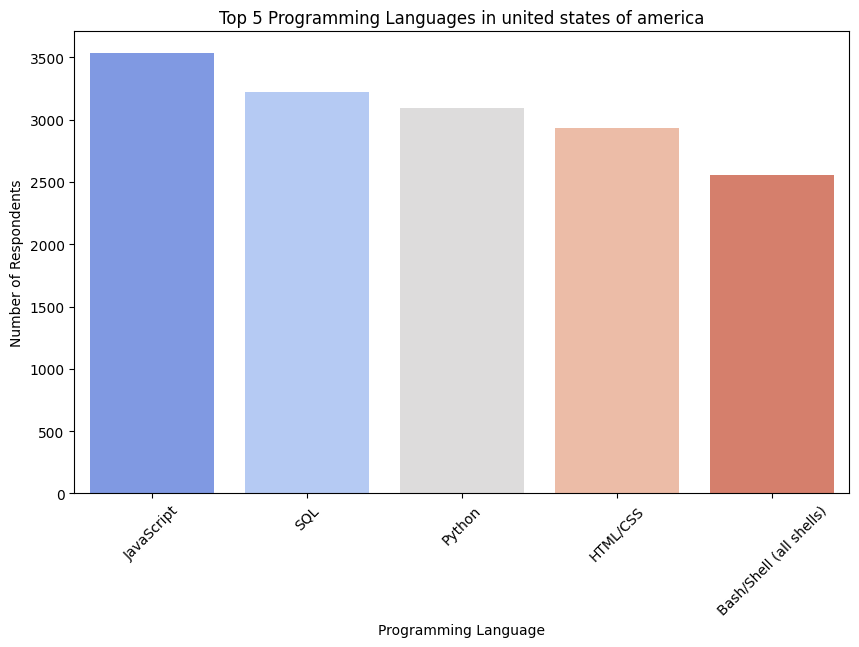


--- Top Languages in Germany ---
JavaScript                 1462
Python                     1342
HTML/CSS                   1320
SQL                        1272
Bash/Shell (all shells)    1118
Name: count, dtype: int64


/tmp/ipykernel_300/3707009262.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='coolwarm')


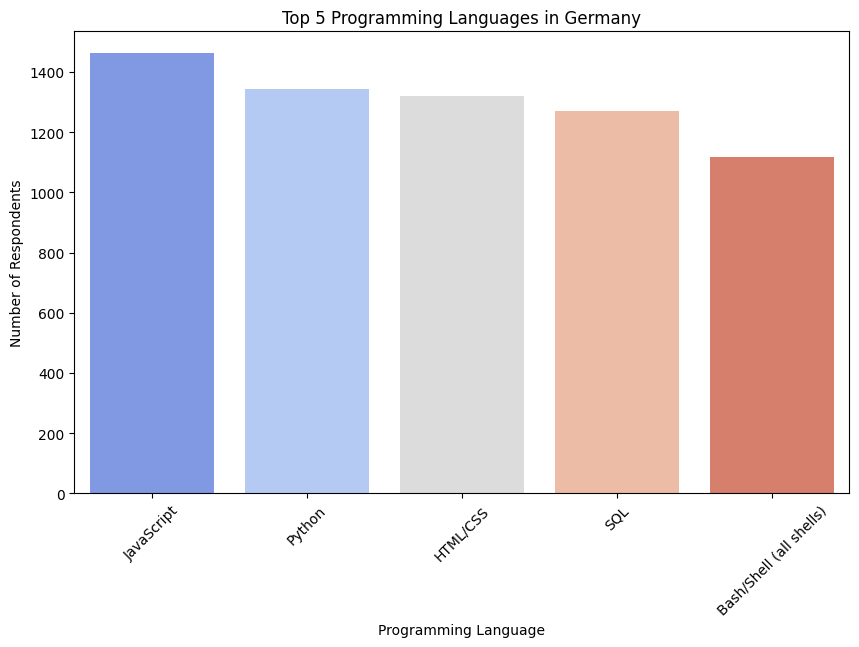

--------------------------------------------------


In [20]:
## Write your code here
# --- Analysis of Programming Language Popularity by Region ---
print("\n### Analysis: Programming Language Popularity by Region ###")

# Re-create the cleaned country column to ensure it exists before mapping
df_cleaned['Country_Cleaned'] = df_cleaned['Country'].str.lower().str.strip()
country_standardization_map = {
    'usa': 'United States',
    'uk': 'United Kingdom',
    'canada': 'Canada',
    'france': 'France',
    'germany': 'Germany',
    'united kingdom': 'United Kingdom'
}
df_cleaned['Country_Standardized'] = df_cleaned['Country_Cleaned'].map(country_standardization_map)
df_cleaned['Country_Standardized'].fillna(df_cleaned['Country_Cleaned'], inplace=True)

# Find the top 2 countries with the most respondents to analyze
top_countries = df_cleaned['Country_Standardized'].value_counts().nlargest(2).index.tolist()

if len(top_countries) > 0:
    for country in top_countries:
        print(f"\n--- Top Languages in {country} ---")
        
        # Filter the DataFrame for the current country
        country_df = df_cleaned[df_cleaned['Country_Standardized'] == country].copy()
        
        # Split the 'LanguageWorkedWith' column and count occurrences of each language
        languages = country_df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()
        language_counts = languages.value_counts().nlargest(5)

        print(language_counts)
        
        # Visualize the results
        plt.figure(figsize=(10, 6))
        sns.barplot(x=language_counts.index, y=language_counts.values, palette='coolwarm')
        plt.title(f'Top 5 Programming Languages in {country}')
        plt.xlabel('Programming Language')
        plt.ylabel('Number of Respondents')
        plt.xticks(rotation=45)
        plt.show()
else:
    print("\nNot enough data to perform a regional analysis of programming languages.")

print("-" * 50)



#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.



### Analysis: Correlation between Years of Experience and Job Satisfaction ###

Correlation between YearsCodePro and JobSat: -0.04


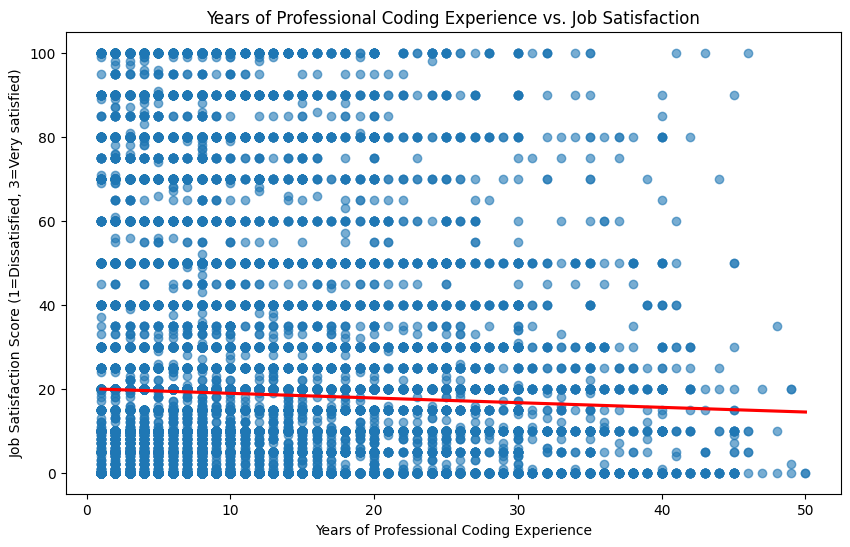

--------------------------------------------------


In [22]:
## Write your code here
# --- Analysis: Correlation between Years of Experience and Job Satisfaction ---
print("\n### Analysis: Correlation between Years of Experience and Job Satisfaction ###")

# Calculate the correlation between the two numerical columns
correlation = df_cleaned['YearsCodePro'].corr(df_cleaned['JobSatPoints_1'])
print(f"\nCorrelation between YearsCodePro and JobSat: {correlation:.2f}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='YearsCodePro', y='JobSatPoints_1', data=df_cleaned, ci=None, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Years of Professional Coding Experience vs. Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (1=Dissatisfied, 3=Very satisfied)')
plt.show()

print("-" * 50)

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.



### Analysis: Educational Background vs. Employment Type ###

Unique values in 'EdLevel':
['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else'
 'Primary/elementary school']

Unique values in 'Employment':
['Employed, full-time' 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Employed, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed'
 'Stude

/tmp/ipykernel_300/4122425742.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


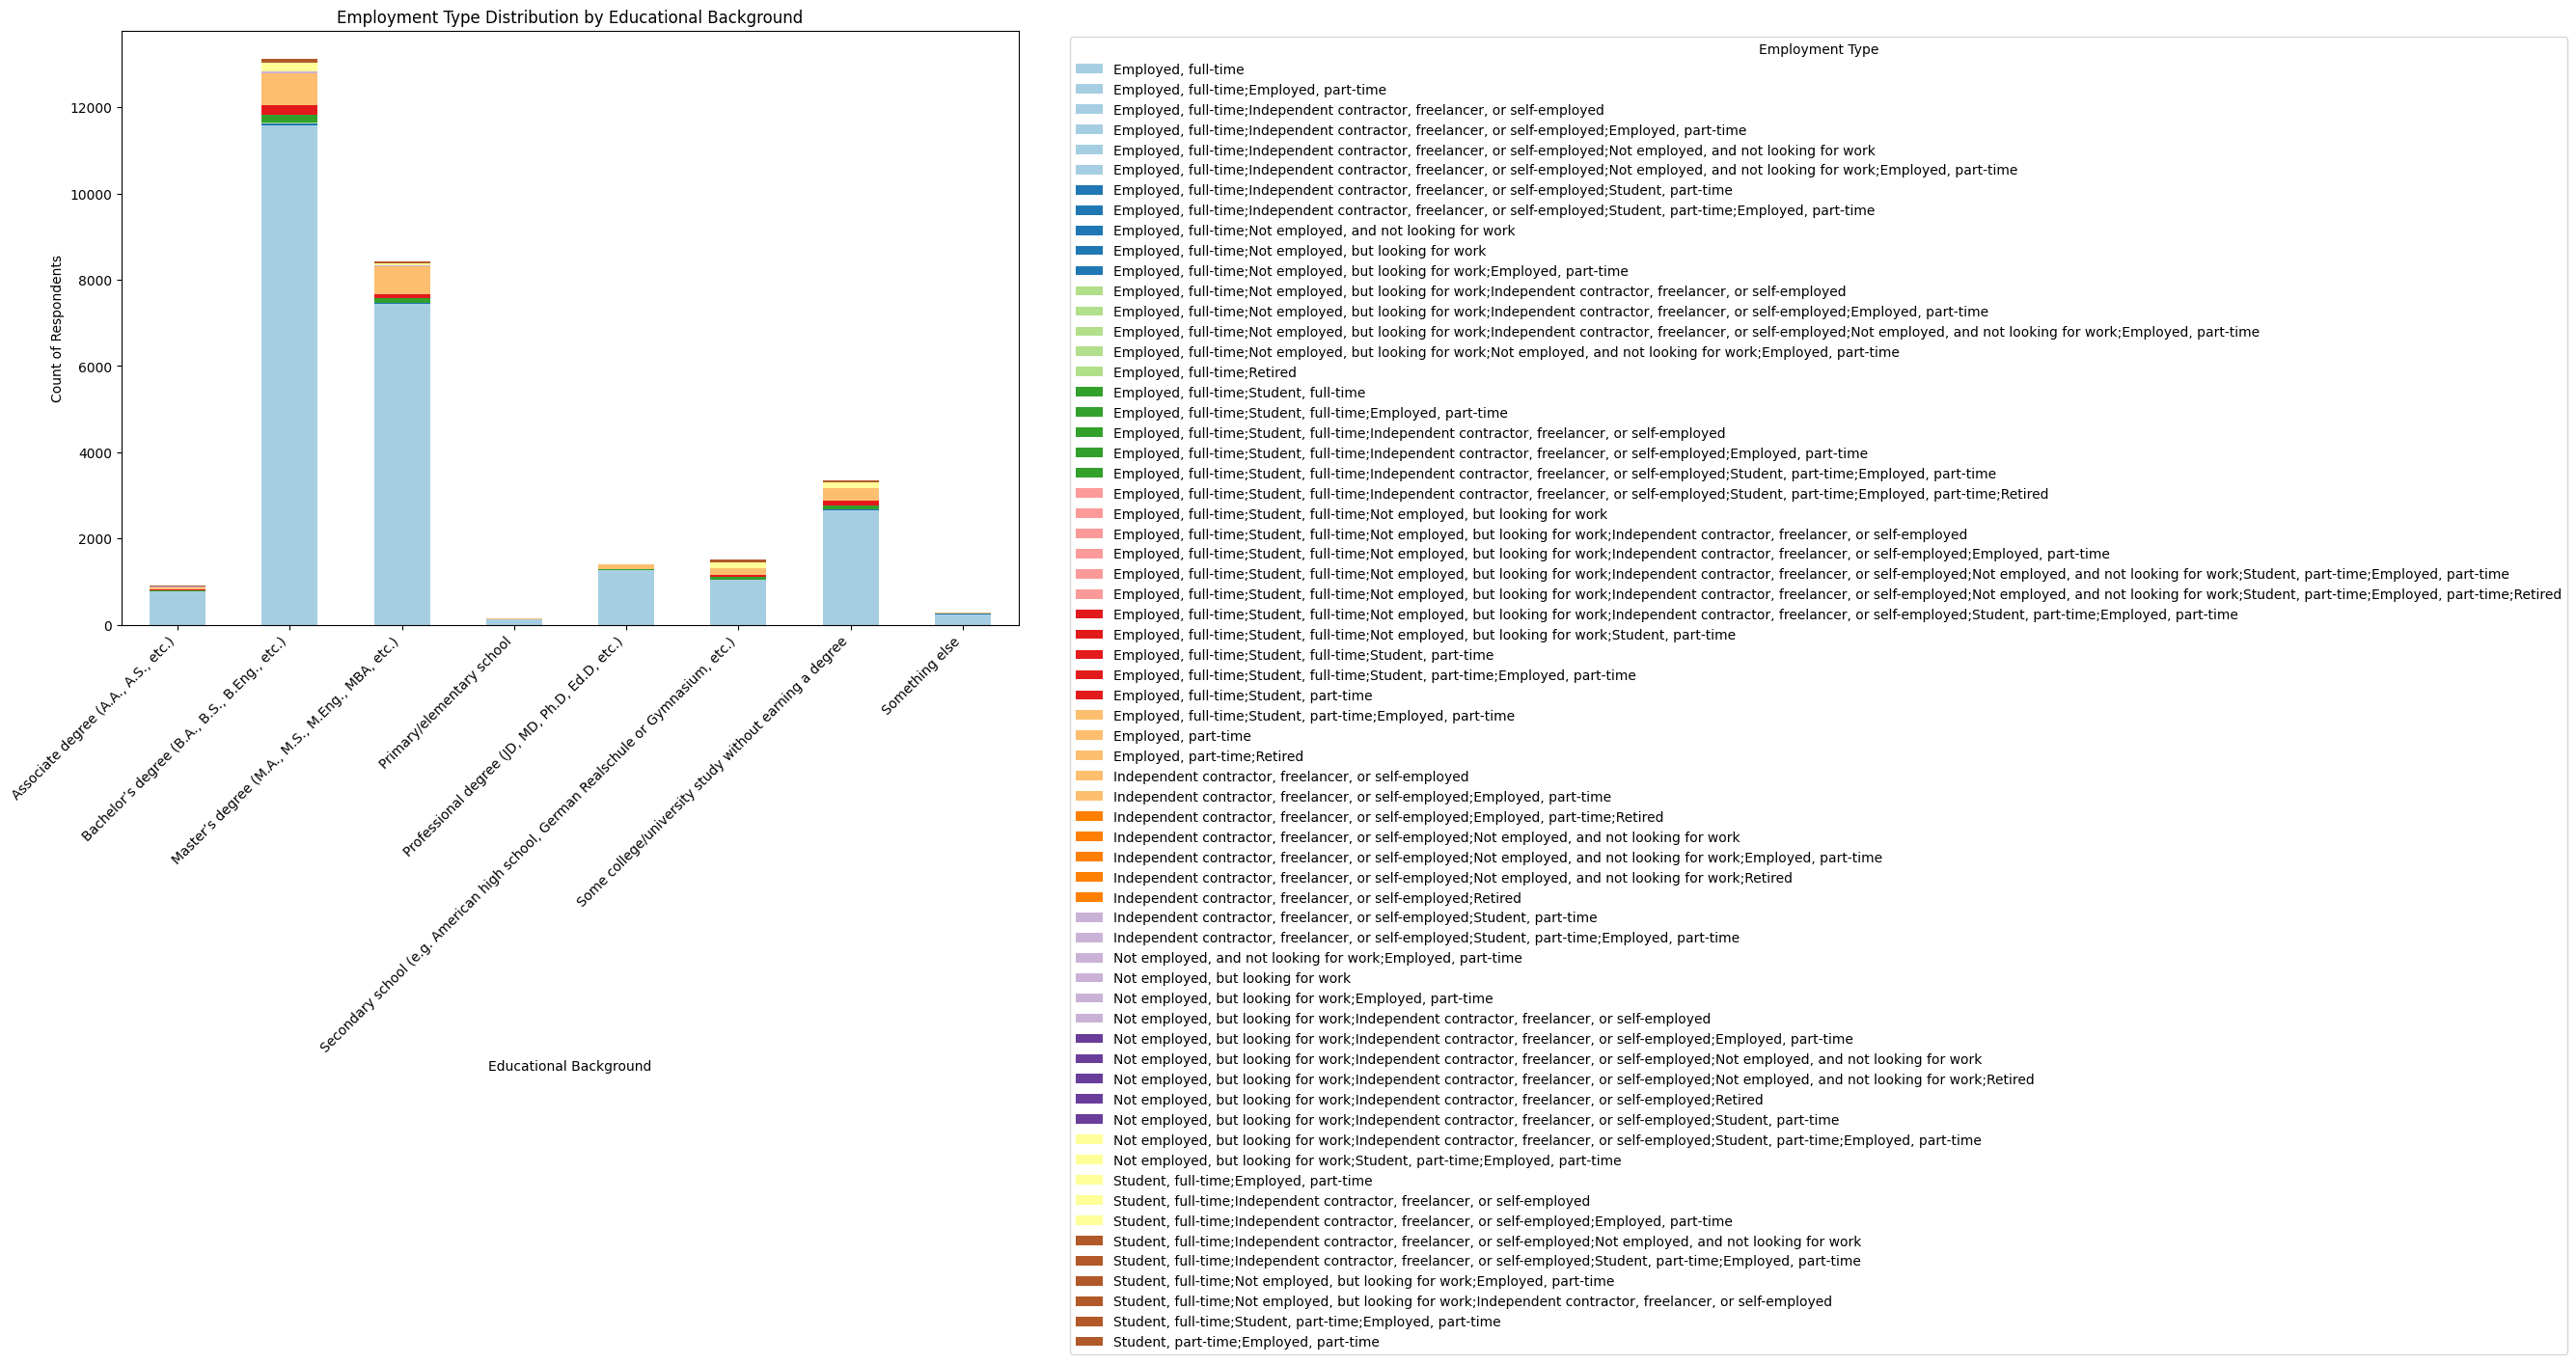

--------------------------------------------------


In [24]:
## Write your code here
# --- New Analysis: Educational Background vs. Employment Type ---
print("\n### Analysis: Educational Background vs. Employment Type ###")

# Check unique values for the two columns
print("\nUnique values in 'EdLevel':")
print(df_cleaned['EdLevel'].unique())
print("\nUnique values in 'Employment':")
print(df_cleaned['Employment'].unique())

# Cross-tabulate EdLevel and Employment
cross_tab_ed_emp = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['Employment'])
print("\nCross-tabulation of Educational Background by Employment Type:")
print(cross_tab_ed_emp)

# Visualize the cross-tabulation as a stacked bar chart
cross_tab_ed_emp.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Employment Type Distribution by Educational Background')
plt.xlabel('Educational Background')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("-" * 50)


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
